# Loading libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df["Exited"].unique()

array([1, 0], dtype=int64)

In [4]:
df.shape

(10000, 14)

# Exploring the Data "EDA"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data cleaning

In [7]:
# droping unnecessary columns
df.drop(['CustomerId','Surname', "RowNumber"],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#convert Gender column to binary values
df["Gender"] = df["Gender"].map({"Female":0, "Male":1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
one_hot = pd.get_dummies(df["Geography"])

new_df = df.drop("Geography", axis = 1)

new_df = new_df.join(one_hot)

new_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [13]:
new_df.duplicated().sum()

0

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
 12  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [15]:
new_df.to_csv("new_data.csv")

# Data visualization 

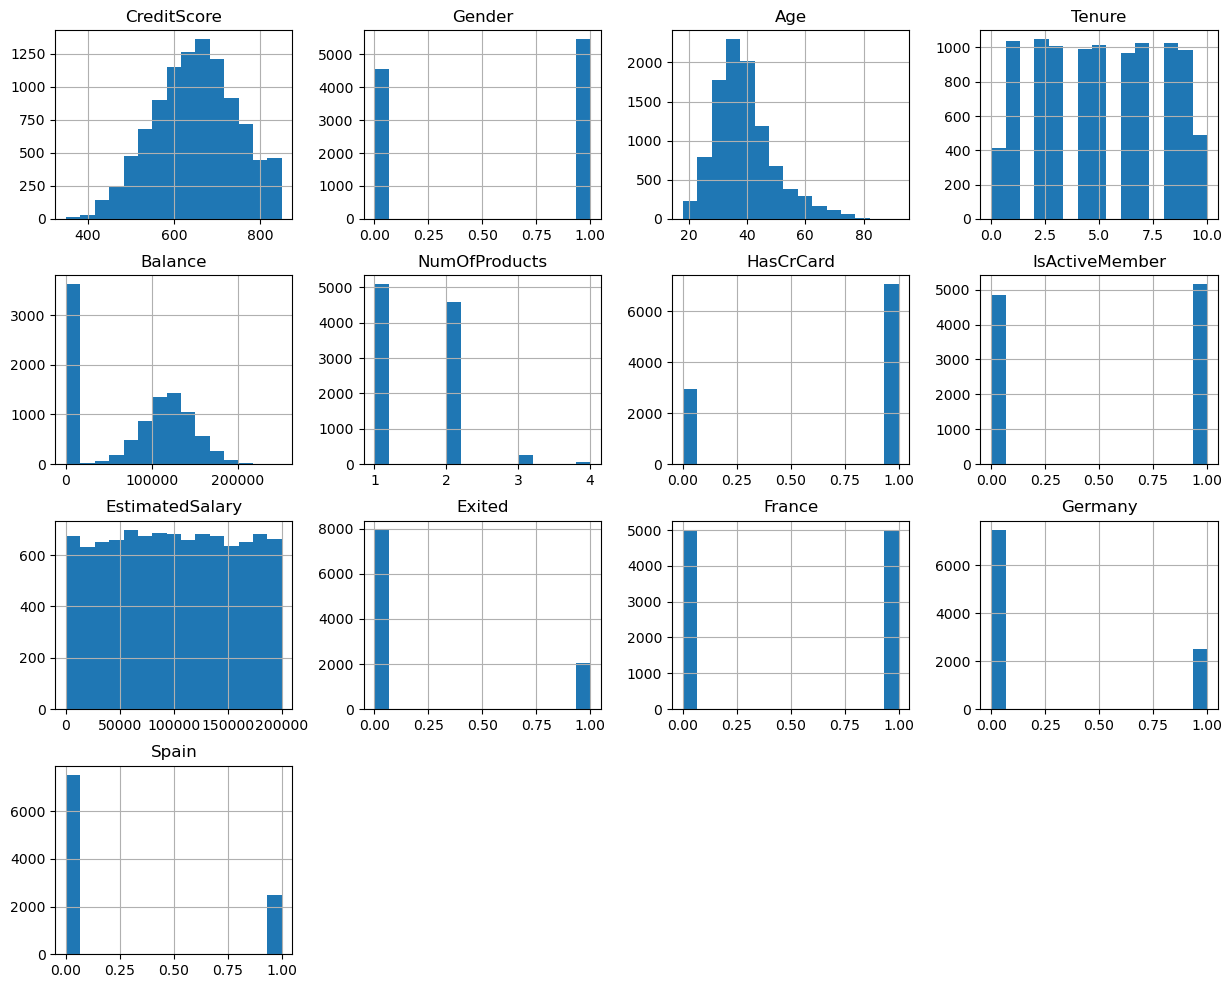

In [16]:
new_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

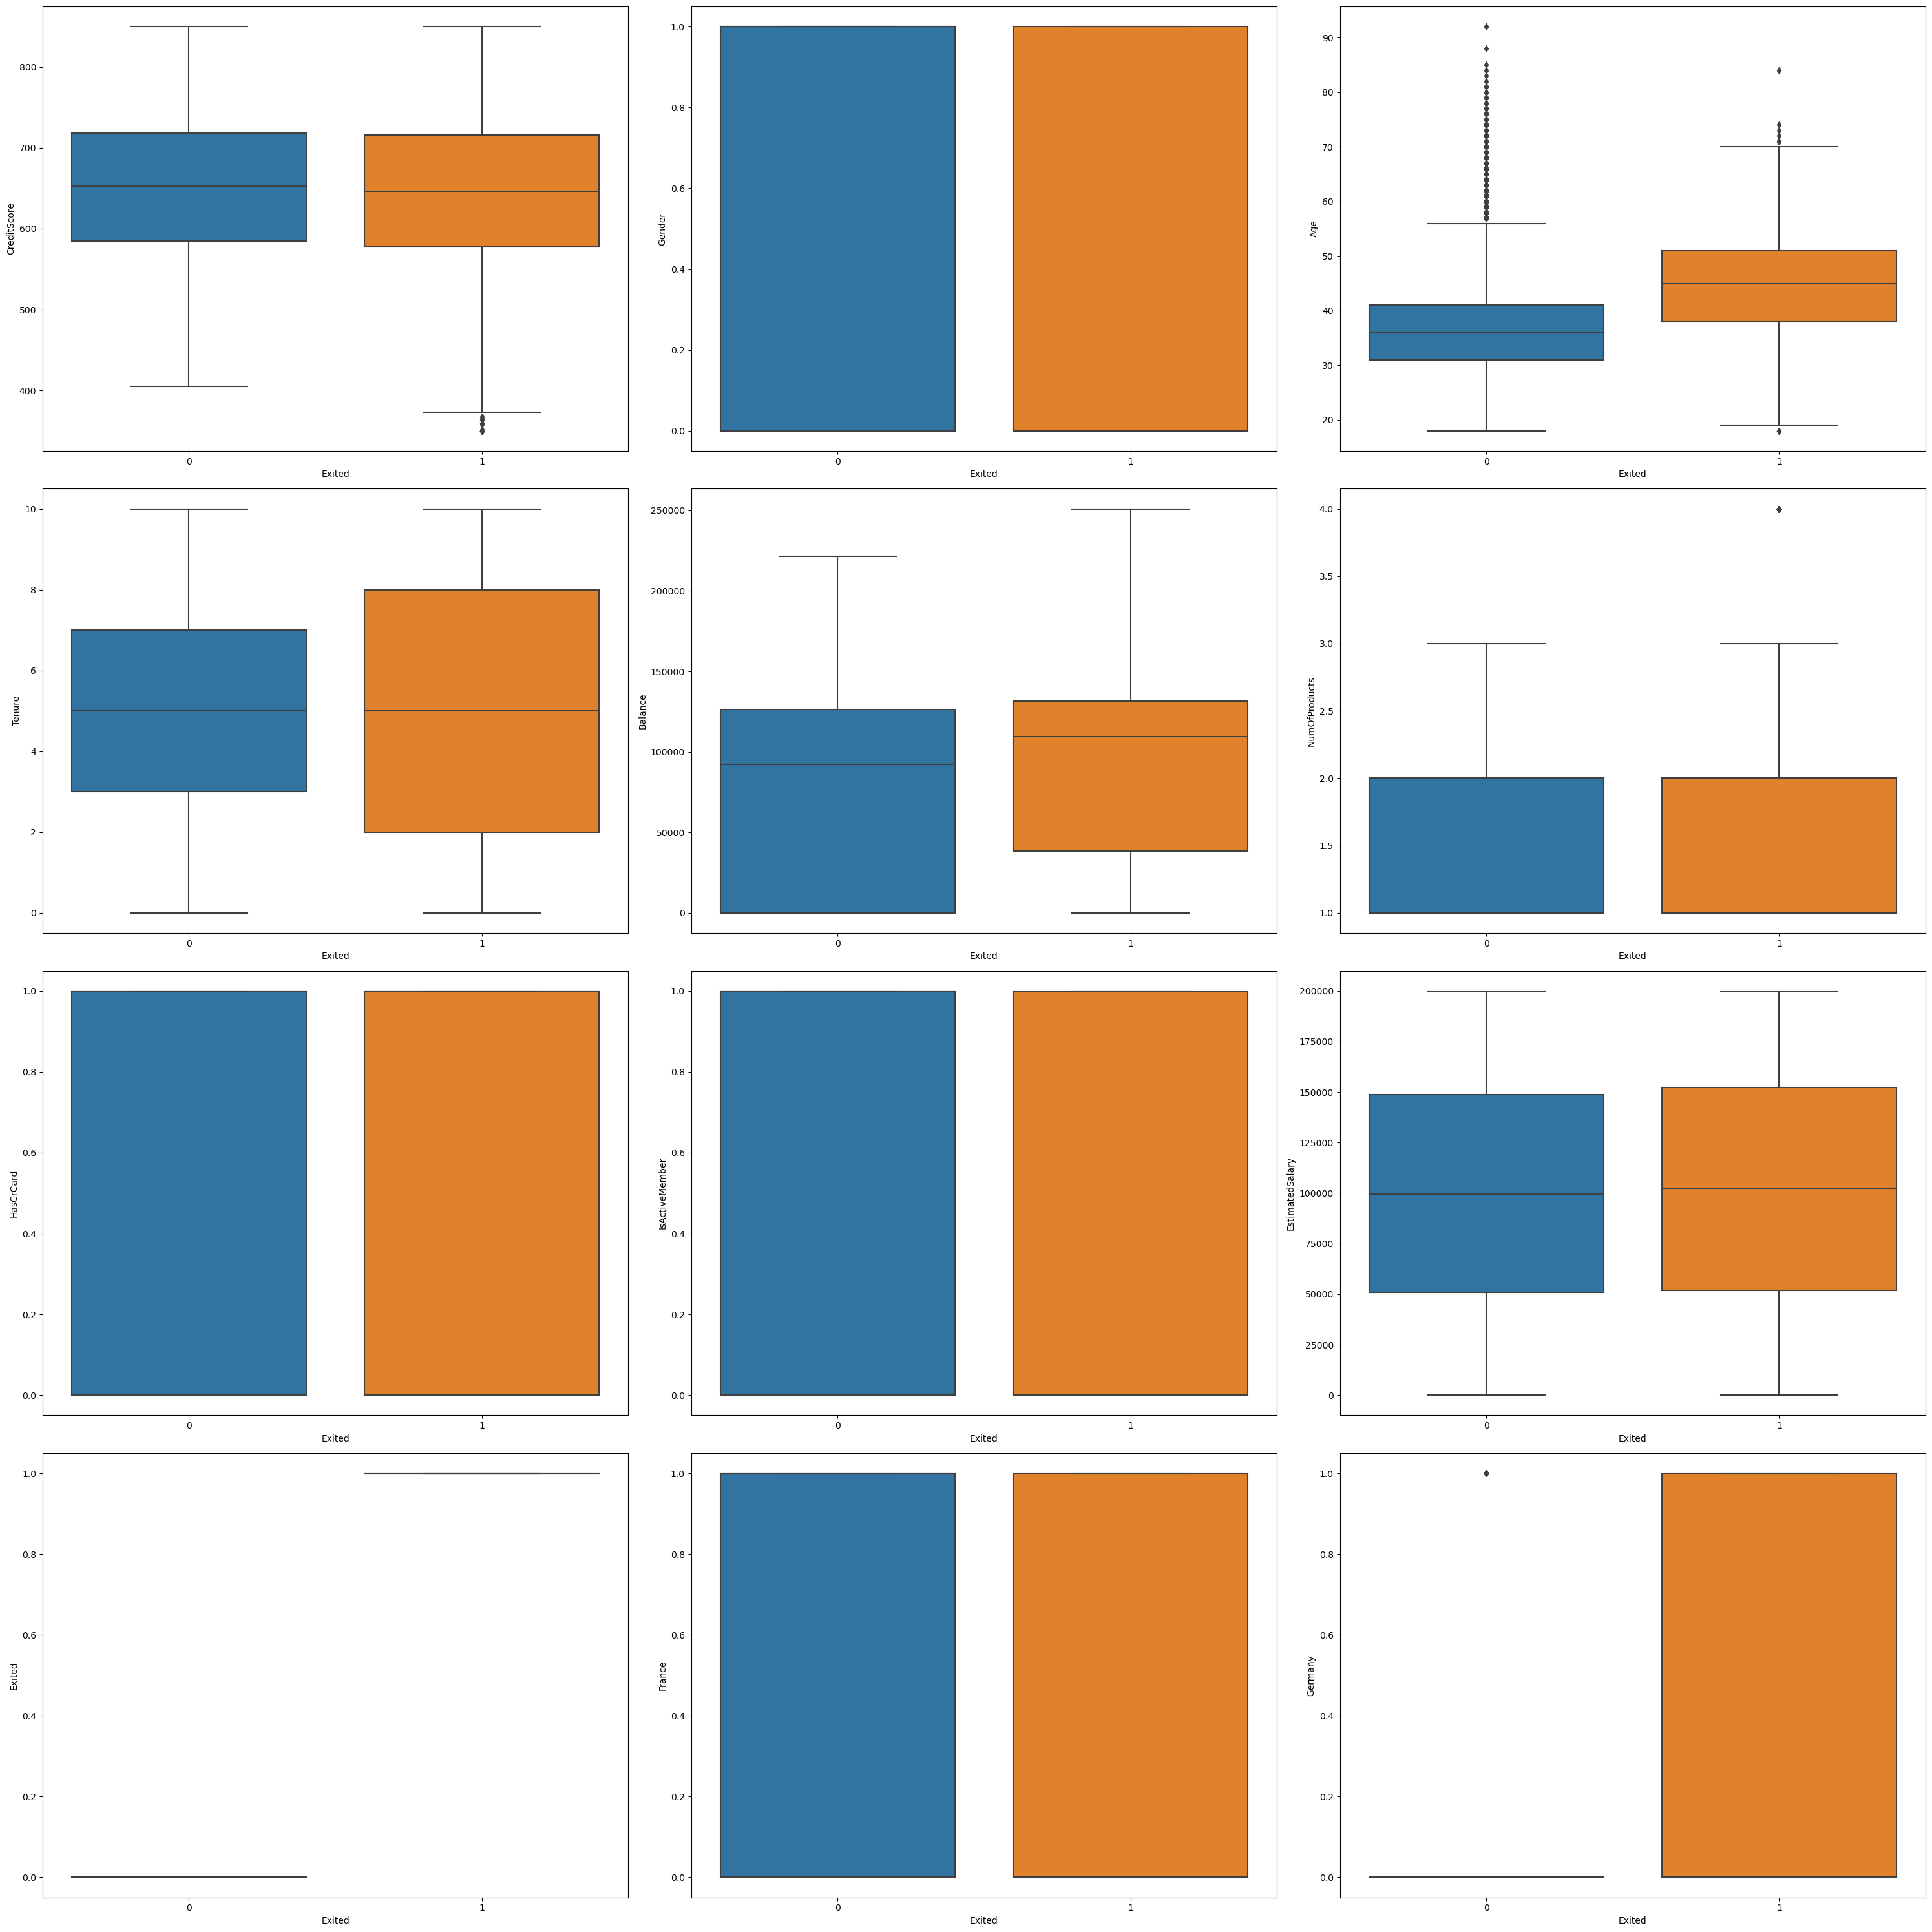

In [17]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(new_df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = new_df['Exited'], y = new_df[new_df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
#plt.title("Individual Features by Class")
plt.show()

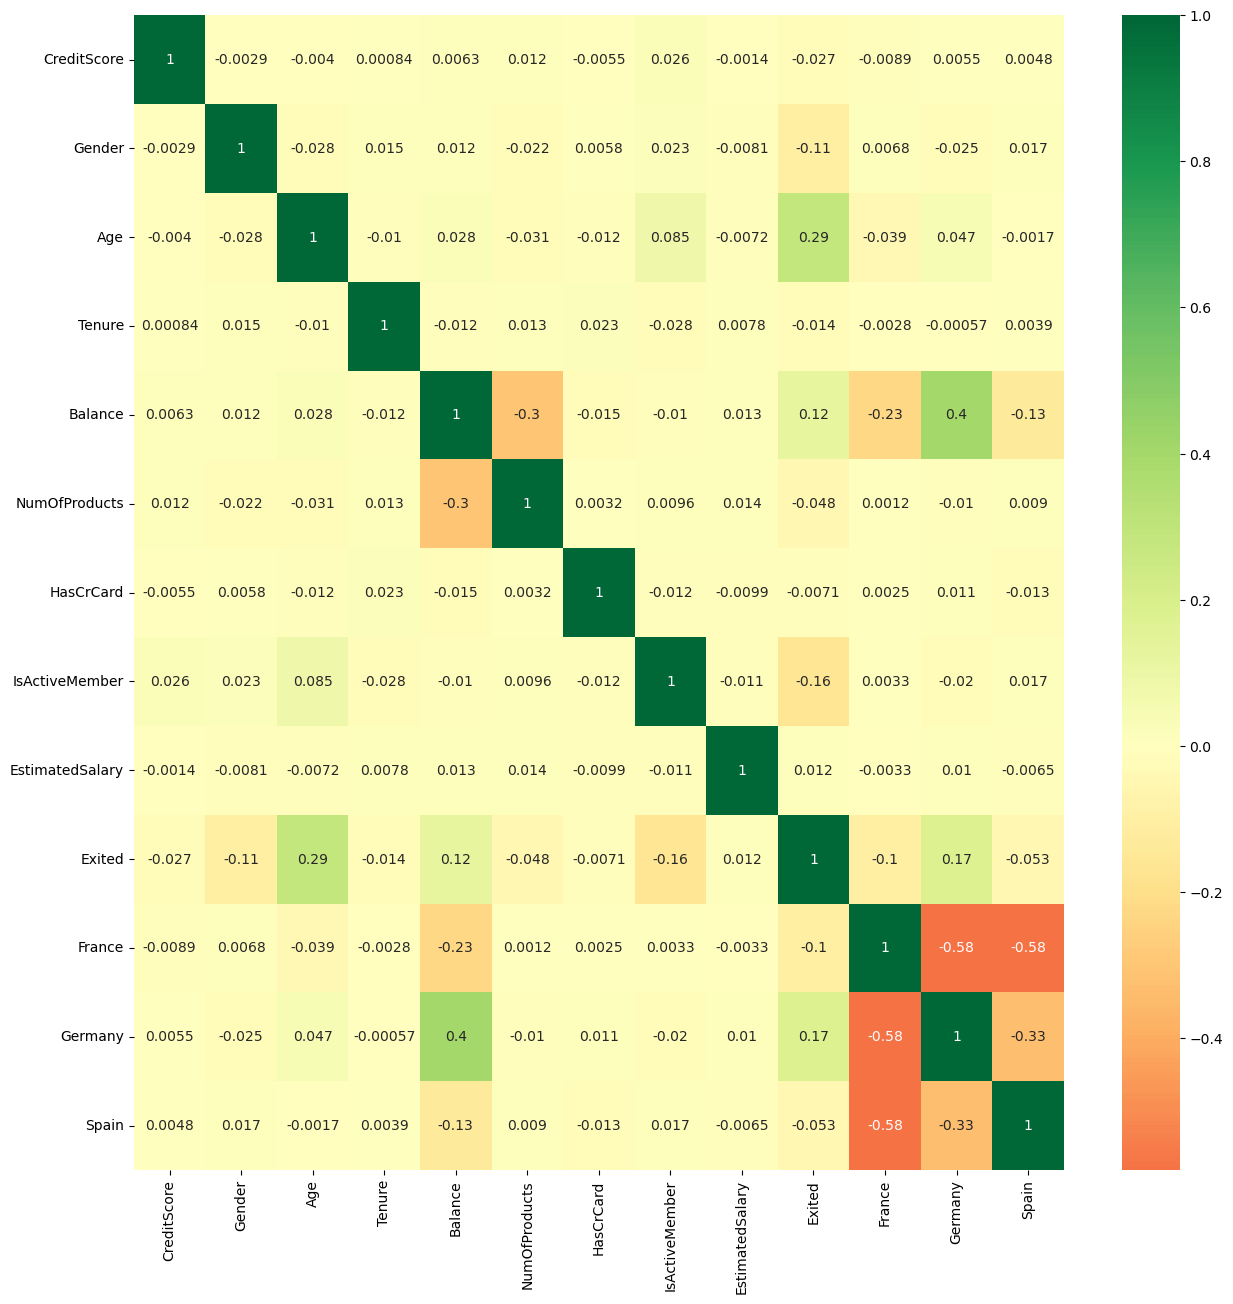

In [18]:
plt.figure(figsize=(15,15))
p=sns.heatmap(new_df.corr(), annot=True,cmap='RdYlGn',center=0) 

# Model building

In [19]:
x = new_df.drop('Exited',axis=1)
y = new_df['Exited']

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 32)

In [21]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train) 

y_pred  = model.predict(x_test)  
print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.81


Text(0.5, 23.52222222222222, 'Predicted label')

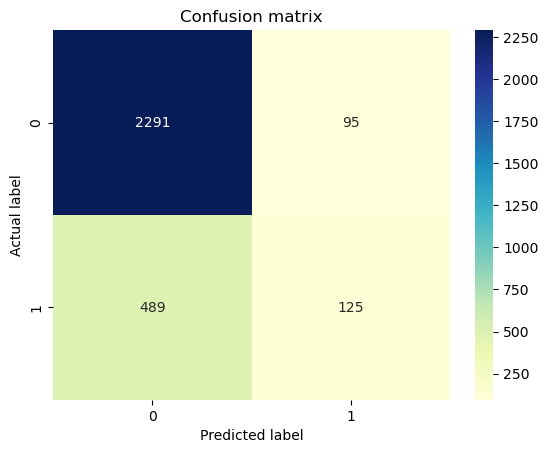

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


# Confusion matrix
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2386
           1       0.57      0.20      0.30       614

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.77      0.81      0.77      3000



# saving the model to use it in streamlit

In [25]:
# Save the model
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [26]:
# another way to save the model
# import pickle
# pickle.dump(model, 'model.pkl')

In [27]:
# the way to save the label encoder Assuming you have a LabelEncoder object named 'label_encoder'
# import joblib
# joblib.dump(label_encoder, 'label_encoder.pkl')

# ANN / DNN

In [28]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [29]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, activation = 'relu', input_dim = 12))

# Adding the two hidden layers, if you want to create DNN you have to but 3 or more
# ANN is 1 or 2 hidden layers only
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(x_train, y_train, batch_size=10)

print('Train score:', score)
print('Train accuracy:', acc)
# Making predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

700/700 [==============================] - 1s 947us/step - loss: 0.3135 - accuracy: 0.8704
Train score: 0.3135406970977783
Train accuracy: 0.8704285621643066
94/94 [==============================] - 0s 1ms/step
********************
300/300 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8503
Test score: 0.35089734196662903
Test accuracy: 0.8503333330154419


Text(0.5, 23.52222222222222, 'Predicted label')

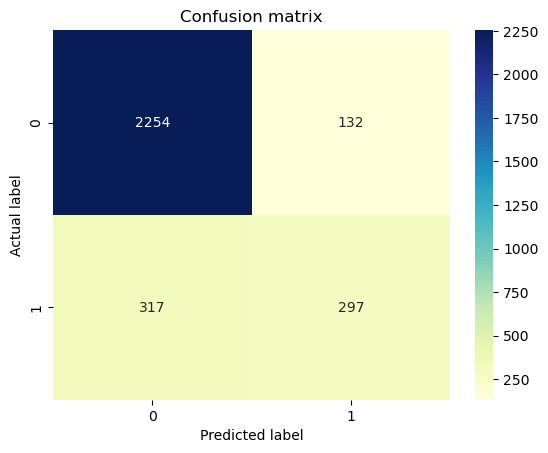

In [30]:
# Confusion matrix
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2386
           1       0.69      0.48      0.57       614

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

